In [1]:
import pathlib
import numpy as np
import tensorflow as tf
import keras
from keras.applications import vgg16
import sys
import pathlib
import PIL
import numpy as np
import tensorflow as tf
import tensorflow.keras.preprocessing.image as image

Using TensorFlow backend.


In [5]:
# Create a tensorflow dataset
data_dir = pathlib.Path('./data/tiny-imagenet-200/train/')
image_count = len(list(data_dir.glob('**/*.JPEG')))
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
print('Discovered {} images'.format(image_count))

# Simple image preprocessing:  Scale images to [0, 1] float32
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

# Create the training data generator
BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64
STEPS_PER_EPOCH = np.ceil(image_count / BATCH_SIZE)
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                      batch_size=BATCH_SIZE,
                                                      shuffle=True,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      classes=list(CLASS_NAMES))

Discovered 100000 images
Found 100000 images belonging to 200 classes.


In [7]:
len(CLASS_NAMES)

200

In [3]:
val_dir = pathlib.Path('./data/tiny-imagenet-200/val/')
image_count = len(list(val_dir.glob('**/*.JPEG')))
CLASS_NAMES = np.array([item.name for item in val_dir.glob('*')])
print('Discovered {} images'.format(image_count))
val_data_gen = image_generator.flow_from_directory(directory=str(val_dir),
                                                      batch_size=BATCH_SIZE,
                                                      shuffle=True,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      classes=list(CLASS_NAMES))

Discovered 10000 images
Found 10000 images belonging to 2 classes.


In [4]:
CLASS_NAMES

array(['images', 'val_annotations.txt'], dtype='<U19')

In [43]:
# Create a simple model
# model = tf.keras.Sequential([
#     tf.keras.layers.Reshape((64*64*3,), input_shape=(64, 64, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(len(CLASS_NAMES)),
# ])

# model = vgg16.VGG16(weights='imagenet', input_shape=(64, 64, 3), include_top=False, classes=200)

# Train the simple model
# model.evaluate_generator(train_data_gen)

# Save the final output
# model.save('model.h5')

In [32]:
data_dir = pathlib.Path('./data/tiny-imagenet-200/train/')
CLASSES = sorted([item.name for item in data_dir.glob('*')])
print(len(CLASSES))

200


In [35]:
with open('./eval.csv', 'r') as eval_output_file:  # Open the evaluation CSV file for writing
    for line in eval_output_file:
        image_id, image_path, image_height, image_width, image_channels = line.strip().split(',')
        print(image_id, image_path, image_height, image_width, image_channels)
        image_data = image.img_to_array(image.load_img(image_path, target_size=(64, 64)))
        preprocessed_image_data = image_data / 255.0
        
        prediction_probs = model.predict(np.expand_dims(preprocessed_image_data, 0))
        print(prediction_probs.shape)
        prediction = int(np.argmax(prediction_probs.reshape(-1)))
        
        print(image_id, prediction)

0 data/tiny-imagenet-200/val/images/val_0.JPEG 64 64 3
(1, 2, 2, 512)
0 1179
1 data/tiny-imagenet-200/val/images/val_1.JPEG 64 64 3
(1, 2, 2, 512)
1 667
2 data/tiny-imagenet-200/val/images/val_2.JPEG 64 64 3
(1, 2, 2, 512)
2 1691
3 data/tiny-imagenet-200/val/images/val_3.JPEG 64 64 3
(1, 2, 2, 512)
3 667
4 data/tiny-imagenet-200/val/images/val_4.JPEG 64 64 3
(1, 2, 2, 512)
4 1691


In [8]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [17]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [18]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=200, activation="softmax"))

In [19]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=train_data_gen, epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
100/100 [==============================] - 227s 2s/step - loss: 5.3094 - accuracy: 0.0084
Epoch 2/100


/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


100/100 [==============================] - 226s 2s/step - loss: 5.2995 - accuracy: 0.0031
Epoch 3/100
 11/100 [==>...........................] - ETA: 3:25 - loss: 5.2917 - accuracy: 0.0085

KeyboardInterrupt: 

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [ ]:
def generate_batch():
    pass

In [63]:
model = VGG16()
img_path = "data/tiny-imagenet-200/val/images/val_23.JPEG"

In [64]:
image = load_img(img_path, target_size=(224, 224))

In [65]:
image = img_to_array(image)

In [66]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [67]:
image = preprocess_input(image)

In [68]:
yhat = model.predict(image)

In [69]:
label = decode_predictions(yhat)

In [70]:
label = label[0][0]

In [71]:
print('%s (%.2f%%)' % (label[1], label[2]*100))

container_ship (66.91%)


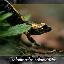

In [72]:
from IPython.display import Image
Image(filename=img_path) 